# Binomial model

In [109]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Exercise 1 - Modeling prior predictive distribution

In [110]:
gen_quant = CmdStanModel(stan_file='Lab3_ex1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


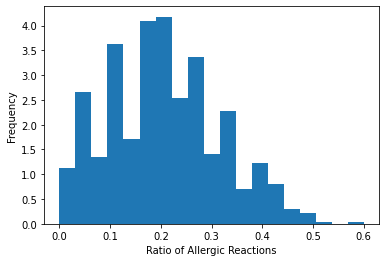

0.20572588832487315


In [111]:
# Generate 1000 samples (pair of p an y)
samples = gen_quant.sample(fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

# Get the generated quantities data as a pandas DataFrame
df = samples.draws_pd()

# Compute ratio of allergic reactions for each sample 
ratios =df['y'] / df['N']

# Create a histogram
plt.hist(ratios, bins = 'auto', density = True)
plt.xlabel('Ratio of Allergic Reactions')
plt.ylabel('Frequency')
plt.show()

print(ratios.mean())
# 7. After verification mean of the ratio is consistent with prior knowledge and amounts to ~0.2

## Exercise 2 - Modeling posterior and posterior predictive distribution

In [112]:
gen_quant = CmdStanModel(stan_file='Lab3_ex2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


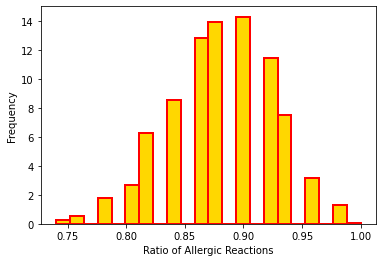

Expected value: 0.8813800000000002
[0.8  0.96]
Probability of the ratio being lower than traditional vaccine: 0.0000


In [129]:
# Generate default samples (pair of p an y)
samples = gen_quant.sample(data={'N':50, 'y': 2}, 
                            fixed_param=True,  
                            iter_warmup=0, 
                            chains = 1)

# Compute ratio of predicted allergic reactions for each sample and create a histogram:
df = samples.draws_pd()
ratios = df['y_pred'] / N
plt.hist(ratios, bins= 'auto', density=True, color = 'gold', edgecolor='red',linewidth=2)
plt.xlabel('Ratio of Allergic Reactions')
plt.ylabel('Frequency')
plt.show()

# Compute the expected value and 94% density interval of the predicted ratio,
# compare it with expected value and 94% density interval of parameter p:
expected_ratio = ratios.mean()
interval = az.hdi(ratios.to_numpy(), credible_interval=0.94)
print(f'Expected value: {expected_ratio}')
print(interval)



# Compute the probability that ratio is lower than the average probability from traditional vaccines:
lower_ratio_prob = (ratios < 0.2).mean()
print(f'Probability of the ratio being lower than traditional vaccine: {lower_ratio_prob:.4f}')